# ⚡ TCR INNOVATION Internship Task

## Team members: 
- AFRAJ MANSURI

### Introduction

In today's business world, attrition is crucial. It is the most significant issue that draws attention to the fact that businesses are losing vital skills and expertise. Because employees are a company's most valuable asset, managers and HR administrators are captivated by lowering turnover inside the organisation in such a way that it contributes to the firm's maximum performance and success. In terms of quantity and quality, they add value to the organisation.

When a corporation gently pushes its employees and on a very limited scale, attrition might provide benefits to the organisation. However, if turnover exceeds a certain threshold, the advantages become disadvantages. Top attrition rates, according to recruiters, dramatically enhance the investment made in personnel, as significant time and financial inputs are required to get qualified individuals. The reasons for attrition are complex, and they vary from organisation to organisation and country to country, depending on the work culture in each region. We're talking about a few companies in the United States that specialise in computers in this dataset. It's also intolerable to apply the conclusion to a different company or an other country.

### 📌 Importing Libraries

In [1]:
import numpy as np
import pandas as pd 

import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('/content/HR_Employee_Attrition-1.csv')
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


### 📌 Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [4]:
df.shape

(2940, 35)

In [5]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [6]:
df[numeric_cols].head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1102,1,2,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,2,49,279,8,1,1,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,3,37,1373,2,2,1,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,1392,3,4,1,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,591,2,1,1,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df[categorical_cols]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
2935,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
2936,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
2937,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
2938,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [8]:
missing_counts = df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

In [9]:
missing_counts = df[categorical_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

As we can see there are no missing values in the dataset so we can do further pre processing in the data without having any issue of missing data,

In [10]:
df[numeric_cols].describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### 📍 Overview

- MonthlyIncome 
- totalWorkingYears
- yearsAtCompany 
- YearsSinceLastPromotion

When we observe closely, there's the huge gap between the max value and the third quartile in the above mention columns. We need to look closely at this columns. 

In [11]:
df['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

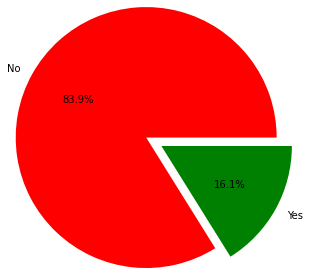

In [12]:
r = df.groupby('Attrition')['Attrition'].count()
plt.pie(r, explode=[0.1, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%', colors=['Red', 'Green']);

The target variable is imbalance. Only `16.1%` of the employees has left the company which is good, but while training the machine learning algorithm we need to increase this data. Later we will use SMOTE technique to balance the data.

In [13]:
df['Department'].value_counts()

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64

In [14]:
df['EducationField'].value_counts()

Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64

In [15]:
df['JobRole'].value_counts()

Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64

In [16]:
df['Over18'].value_counts()

Y    2940
Name: Over18, dtype: int64

In [17]:
# Reassign target
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

# Drop useless features
df = df.drop(columns=['StandardHours', 'EmployeeCount', 'Over18',])

### 📌  Data Visualization

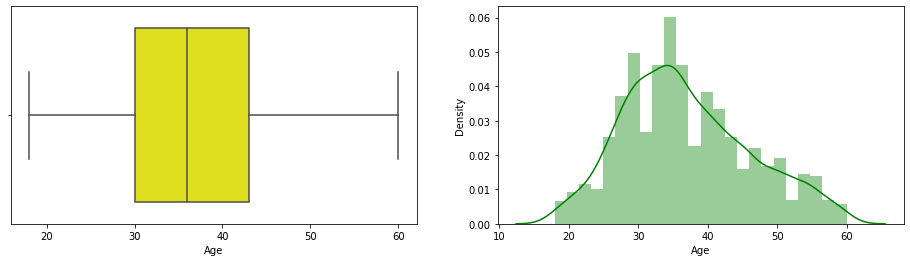

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0], x = df['Age'], color='Yellow')
sns.distplot(ax = axes[1],color = "Green",a=df["Age"])

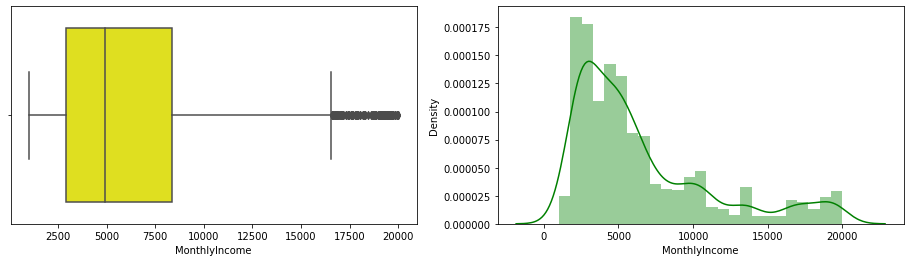

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0],color= 'Yellow',x = df['MonthlyIncome'])
sns.distplot(ax = axes[1],color = "Green",a=df["MonthlyIncome"])

In [20]:
len(df[df['MonthlyIncome']>17500])

162

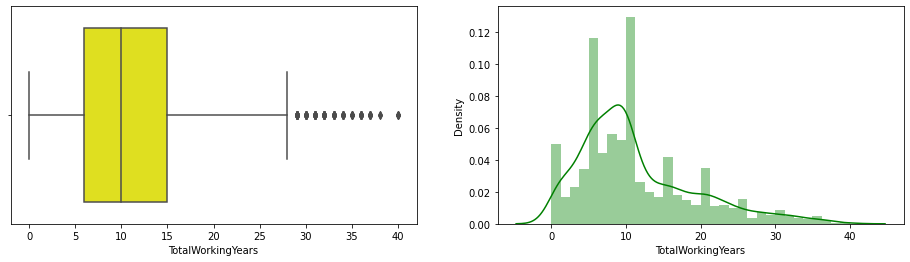

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0],color = "Yellow", x = df['TotalWorkingYears'])
sns.distplot(ax = axes[1],color = "Green" ,a=df["TotalWorkingYears"])

In [22]:
len(df[df['TotalWorkingYears']>28])

126

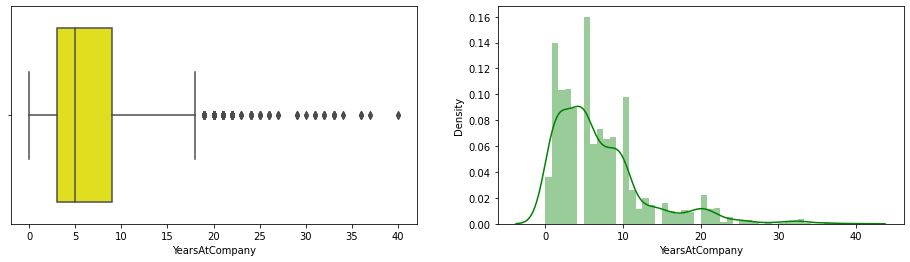

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0],color = "Yellow",x = df['YearsAtCompany'])
sns.distplot(ax = axes[1],color = "Green" ,a=df["YearsAtCompany"])

In [24]:
len(df[df['YearsAtCompany']>18])

208

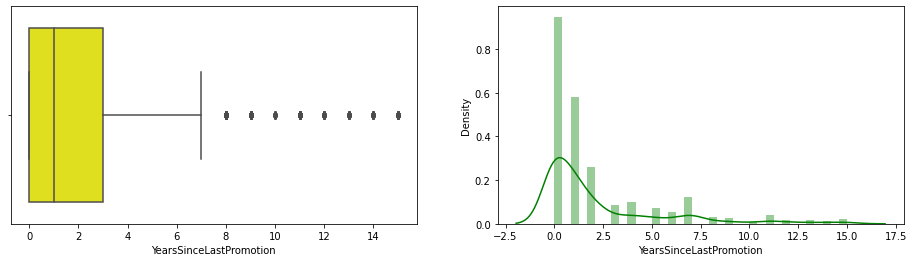

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0], color = "Yellow", x = df['YearsSinceLastPromotion'])
sns.distplot(ax = axes[1],color = "Green", a=df["YearsSinceLastPromotion"])

In [26]:
len(df[df['YearsSinceLastPromotion']>7])

214

We cannot remove all the data. But it's weird, more than 8 years and no promotion! This is the true outliers. So we can remove this data to improve our model

In [27]:
df = df[df['YearsSinceLastPromotion']<7]

In [28]:
len(df)

2574

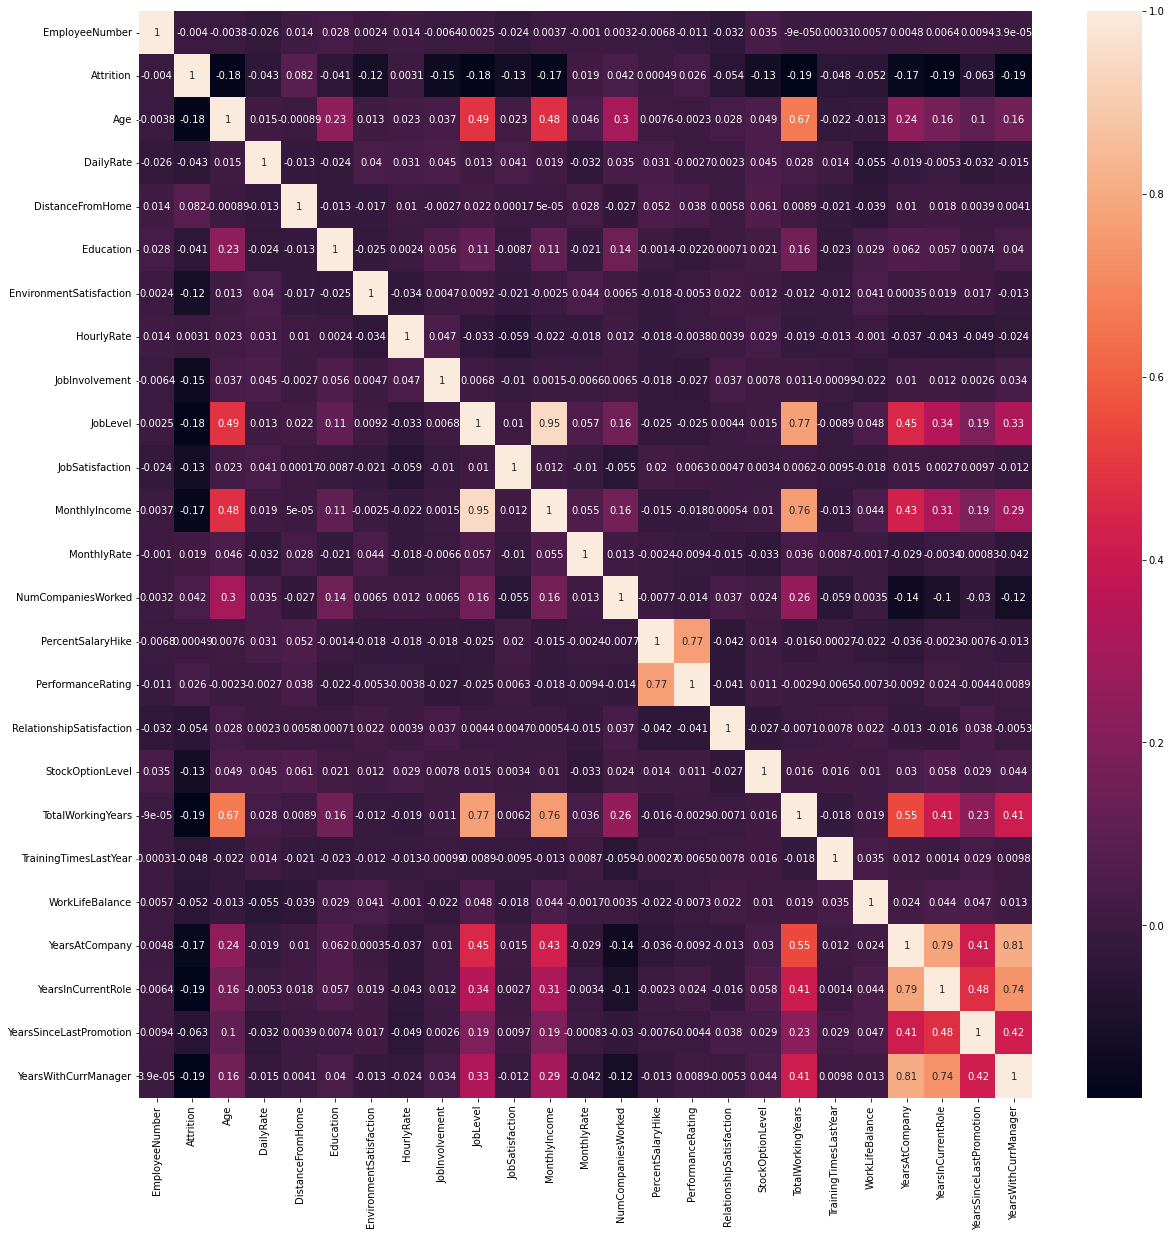

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

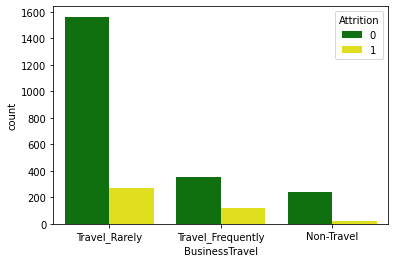

In [30]:
sns.countplot(x='BusinessTravel',palette=['Green', 'Yellow'], hue='Attrition', data=df);

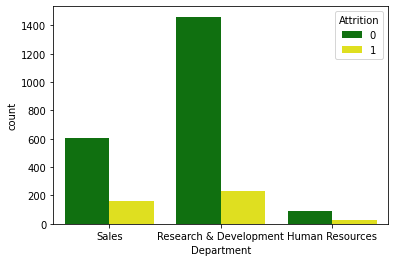

In [31]:
sns.countplot(x='Department', hue='Attrition',palette=['Green', 'Yellow'], data=df);

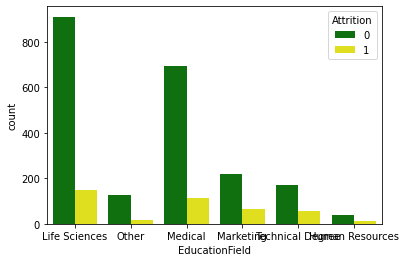

In [32]:
sns.countplot(x='EducationField', hue='Attrition', palette=['Green', 'Yellow'], data=df);

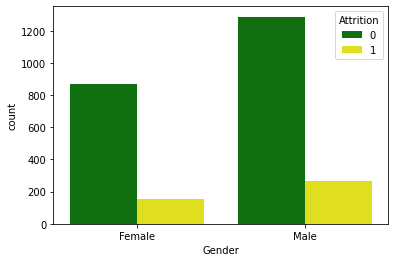

In [33]:
sns.countplot(x='Gender', hue='Attrition', palette=['Green', 'Yellow'] ,data=df);

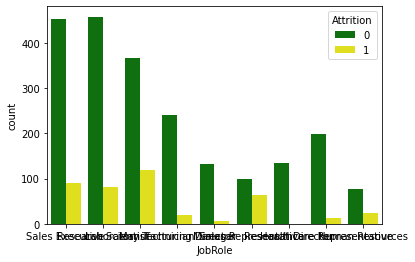

In [34]:
sns.countplot(x='JobRole', hue='Attrition', palette=['Green', 'Yellow'], data=df);

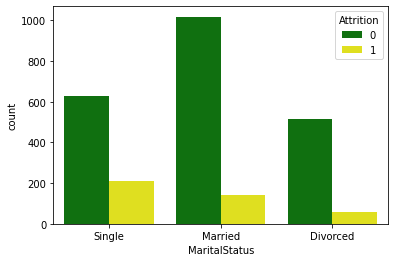

In [35]:
sns.countplot(x='MaritalStatus', hue='Attrition', palette=['Green', 'Yellow'], data=df);

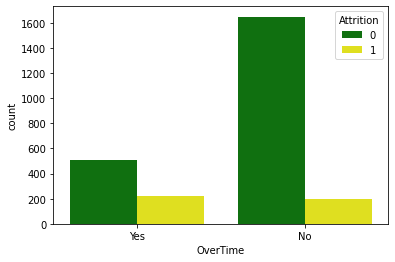

In [36]:
sns.countplot(x='OverTime', hue='Attrition', palette=['Green', 'Yellow'], data=df);

### 📌 Preparing data for training

In [37]:
df["Attrition"] = LabelEncoder().fit_transform(df['Attrition'])
df["BusinessTravel"] = LabelEncoder().fit_transform(df['BusinessTravel'])
df["Department"] = LabelEncoder().fit_transform(df['Department'])
df["EducationField"] = LabelEncoder().fit_transform(df['EducationField'])
df["Gender"] = LabelEncoder().fit_transform(df['Gender'])
df["JobRole"] = LabelEncoder().fit_transform(df['JobRole'])
df["MaritalStatus"] = LabelEncoder().fit_transform(df['MaritalStatus'])
df["OverTime"] = LabelEncoder().fit_transform(df['OverTime'])

In [38]:
numeric_cols.remove('StandardHours')
numeric_cols.remove('EmployeeCount')
df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])

In [39]:
cols = list(df.columns)
cols.remove("Attrition")
sampled,target = SMOTE().fit_resample(df[cols],df["Attrition"])

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(sampled[cols], target, test_size = 0.3, shuffle=True)

### 📌  Model Training

Train Accuracy : 0.78 %
Test Accuracy : 0.79 %


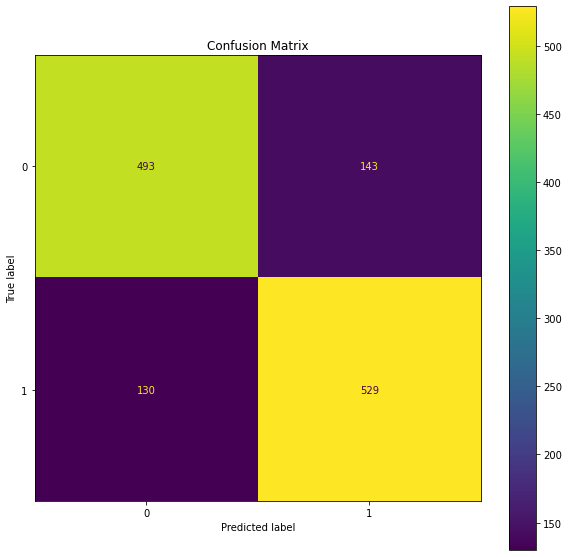

In [41]:
logistic_model = LogisticRegression(solver='liblinear',random_state=0).fit(X_train,Y_train)

print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,logistic_model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)

plt.show()

Train Accuracy : 1.00 %
Test Accuracy : 0.99 %


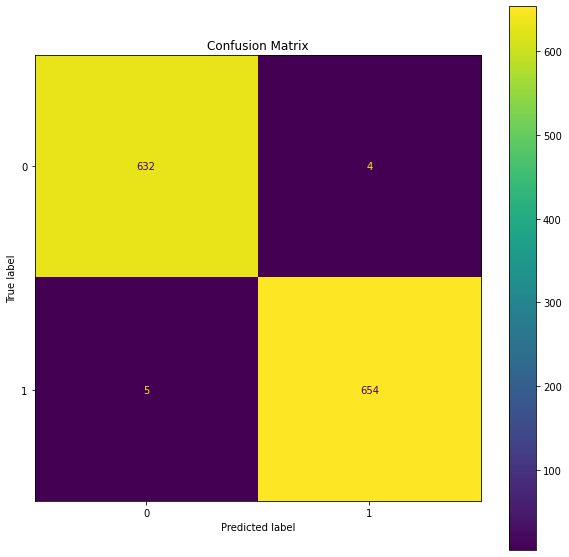

In [42]:
random_forest = RandomForestClassifier(n_estimators=590, random_state=0).fit(X_train,Y_train)

print("Train Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,random_forest.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)

plt.show()

Train Accuracy : 0.98 %
Test Accuracy : 0.96 %


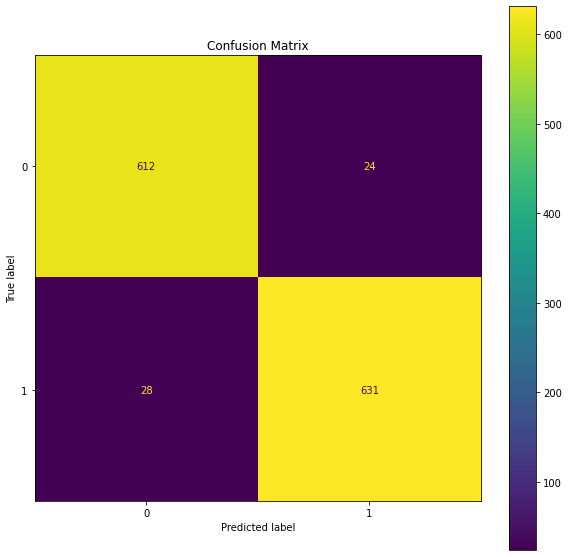

In [43]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.01,n_estimators=2000,use_label_encoder=False,random_state=420).fit(X_train,Y_train)

print("Train Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)

plt.show()

###  📌 Conclusion

- Logistic Regression model has a low accuracy score of `77%`
- Random Forest Classifier performs much better having the score of `90%`
- XGBoost model has perform with accuracy of `94%`